Install packages & Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report)

**Preprocessing Steps**


Cleaning text data:

*   Removed HTML tags, punctuation, special characters.
*   Converted text to lowercase.


Vectorized text using TF-IDF (5000 max features).

*   Removed common stop words to improve model performance.

In [ ]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

df = pd.read_csv('/content/drive/MyDrive/ml-project/dataset/IMDB Dataset.csv')
df['cleaned_review'] = df['review'].apply(clean_text)
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# TF-IDF Vectorization
# tfidf = TfidfVectorizer(max_features=3000)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
tfidf = TfidfVectorizer(max_features=5000, stop_words=list(ENGLISH_STOP_WORDS))

X_train = tfidf.fit_transform(df['cleaned_review'])
y_train = df['sentiment']

**Visualization**

**Histogram of Sentiment Labels:** Showed distribution between positive and negative reviews.

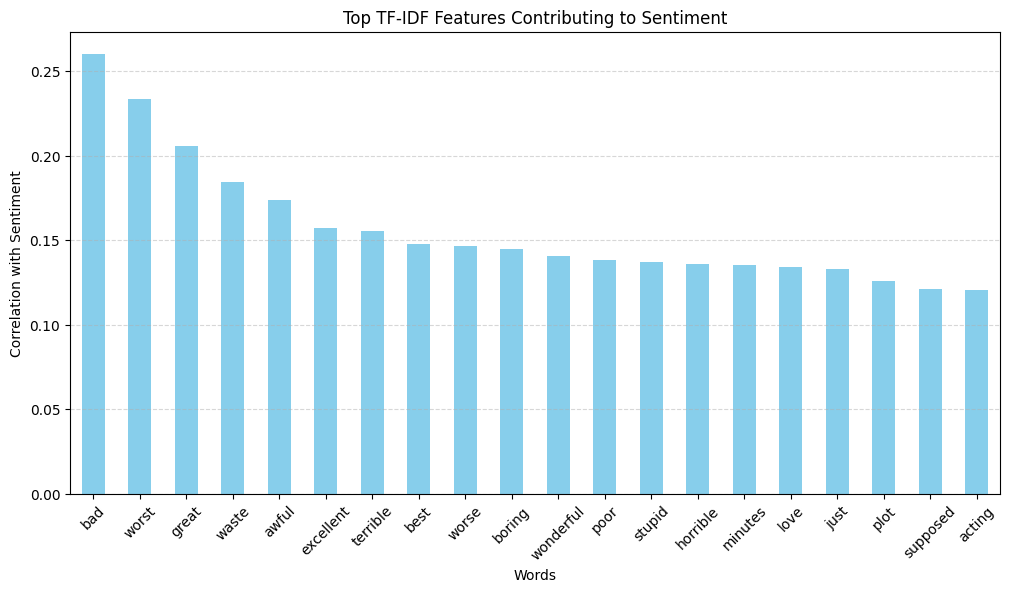

In [ ]:
feature_names = np.array(tfidf.get_feature_names_out())
X_df = pd.DataFrame(X_train.toarray(), columns=feature_names)

# Compute correlation between features and sentiment
correlations = X_df.corrwith(df['sentiment']).abs().sort_values(ascending=False)

# Select top correlated words
top_n = 20
top_features = correlations.head(top_n)

# Plot bar chart of top words contributing to sentiment
plt.figure(figsize=(12, 6))
top_features.plot(kind='bar', color='skyblue')
plt.title("Top TF-IDF Features Contributing to Sentiment")
plt.xlabel("Words")
plt.ylabel("Correlation with Sentiment")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Load test dataset (Amazon Reviews)
amazon_df = pd.read_csv('/content/drive/MyDrive/ml-project/dataset/test.csv')
amazon_df['cleaned_review'] = amazon_df['review_text'].apply(clean_text)
amazon_df['sentiment'] = amazon_df['class_index'].apply(lambda x: 1 if x == 2 else 0)
X_test = tfidf.transform(amazon_df['cleaned_review'])
y_test = amazon_df['sentiment']

**Machine Learning Models Used**

The following ML models were implemented and compared:

1.   Logistic Regression
2.   Naïve Bayes
3.   Support Vector Machine (SVM)
4.   Random Forest Classifier

Each model was trained on IMDB data and tested on Amazon data.

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig(f'/content/drive/MyDrive/ml-project/results/confusion_matrix_{model_name}.png')
    plt.show()


Training Logistic Regression...
[0 1 0 ... 1 1 0]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77    200000
           1       0.76      0.81      0.79    200000

    accuracy                           0.78    400000
   macro avg       0.78      0.78      0.78    400000
weighted avg       0.78      0.78      0.78    400000



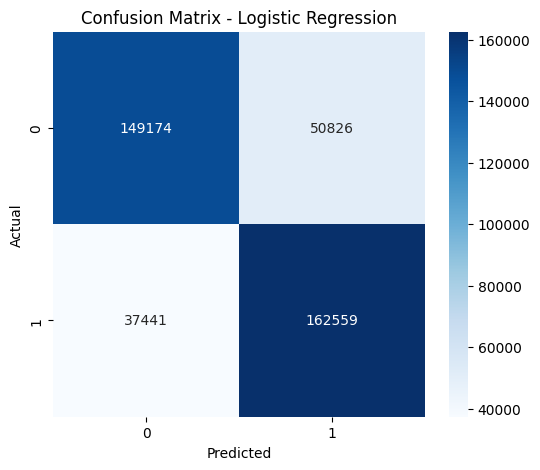


Training Naive Bayes...
[1 1 0 ... 0 1 0]
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75    200000
           1       0.75      0.78      0.76    200000

    accuracy                           0.76    400000
   macro avg       0.76      0.76      0.76    400000
weighted avg       0.76      0.76      0.76    400000



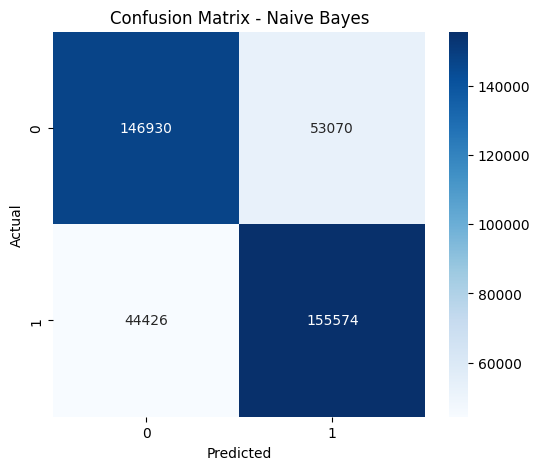


Training SVM...
[0 1 0 ... 1 1 0]
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76    200000
           1       0.75      0.81      0.78    200000

    accuracy                           0.77    400000
   macro avg       0.77      0.77      0.77    400000
weighted avg       0.77      0.77      0.77    400000



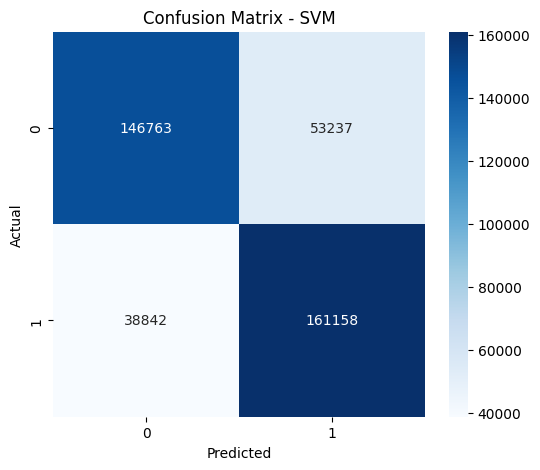


Training Random Forest...
[1 1 0 ... 0 1 0]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.58      0.69    200000
           1       0.68      0.89      0.77    200000

    accuracy                           0.74    400000
   macro avg       0.76      0.74      0.73    400000
weighted avg       0.76      0.74      0.73    400000



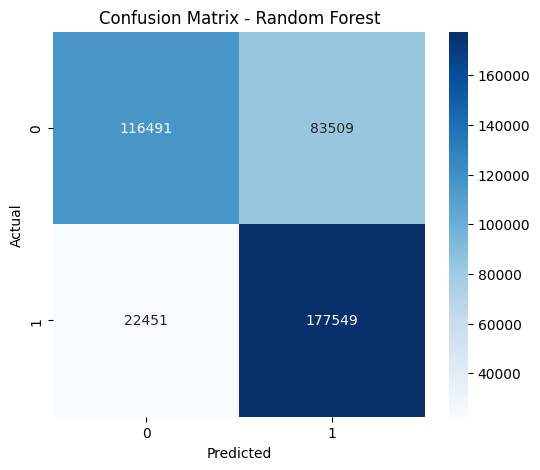

In [ ]:
# Train models and generate plots
for name, model in models.items():
    print(f'\nTraining {name}...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(y_pred)

    # Print Classification Report
    print(f'Classification Report for {name}:' )
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plot_confusion_matrix(y_test, y_pred, name)

In [ ]:
# Function to plot ROC Curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(8, 6))
    for name, model in models.items():
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Baseline
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.savefig('/content/drive/MyDrive/ml-project/results/roc_curve.png')
    plt.show()

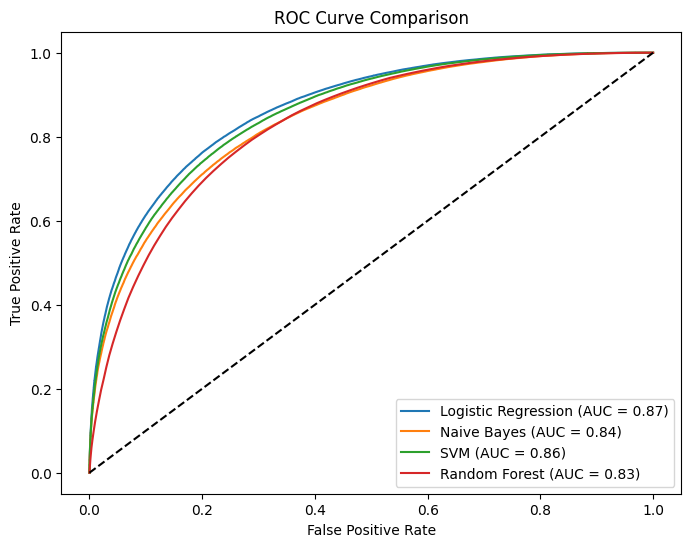

In [ ]:
plot_roc_curve(models, X_test, y_test)

In [ ]:
# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(models, X_test, y_test):
    plt.figure(figsize=(8, 6))
    for name, model in models.items():
        y_probs = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        plt.plot(recall, precision, label=f'{name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.savefig('/content/drive/MyDrive/ml-project/results/precision_recall_curve.png')
    plt.show()

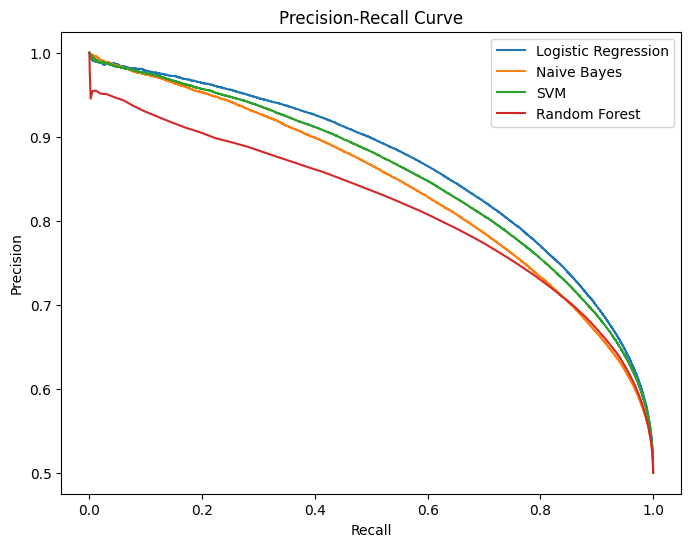

In [ ]:
plot_precision_recall_curve(models, X_test, y_test)


In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

def plot_feature_importance_across_models(models, tfidf, top_n=20):
    feature_names = np.array(tfidf.get_feature_names_out())  # Get feature names
    importance_dict = {}

    for model_name, model in models.items():
        if isinstance(model, LogisticRegression):  # Logistic Regression feature importance
            importance = model.coef_[0]
        elif isinstance(model, MultinomialNB):  # Naive Bayes uses log probabilities
            importance = model.feature_log_prob_[1] - model.feature_log_prob_[0]
        else:
            continue  # Skip models without feature importance

        importance_dict[model_name] = importance

    # Convert to DataFrame for easier manipulation
    importance_df = pd.DataFrame(importance_dict, index=feature_names)

    # Normalize feature importance (scale between 0 and 1)
    scaler = MinMaxScaler()
    importance_df = pd.DataFrame(scaler.fit_transform(importance_df),
                                 columns=importance_df.columns,
                                 index=importance_df.index)

    # Select top N words based on average importance
    top_features = importance_df.mean(axis=1).nlargest(top_n).index
    top_df = importance_df.loc[top_features]

    # Plot
    plt.figure(figsize=(12, 6))
    top_df.plot(kind="barh", figsize=(12, 6), cmap="viridis", alpha=0.75)
    plt.title(f"Top {top_n} Most Important Words Across Models")
    plt.xlabel("Normalized Feature Importance")
    plt.ylabel("Words")
    plt.legend(title="Model")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

# Function to plot feature importance (for Logistic Regression)
# def plot_feature_importance(model, tfidf):
#     feature_names = tfidf.get_feature_names_out()
#     importance = model.coef_[0]
#     top_features = np.argsort(importance)[-20:]
#     print(np.argsort(importance)[-100:])
#     plt.figure(figsize=(10, 5))
#     sns.barplot(x=importance[top_features], y=[feature_names[i] for i in top_features])
#     plt.title('Top 20 Most Important Words')
#     plt.xlabel('Coefficient Value')
#     plt.savefig('/content/drive/MyDrive/ml-project/results/feature_importance.png')
#     plt.show()

This horizontal bar chart compares the importance of the top 20 words in predicting sentiment across Logistic Regression and Naïve Bayes models.

The X-axis represents the normalized feature importance (scaled between 0 and 1).

The Y-axis lists the top 20 most important words that contribute to sentiment classification.

<Figure size 1200x600 with 0 Axes>

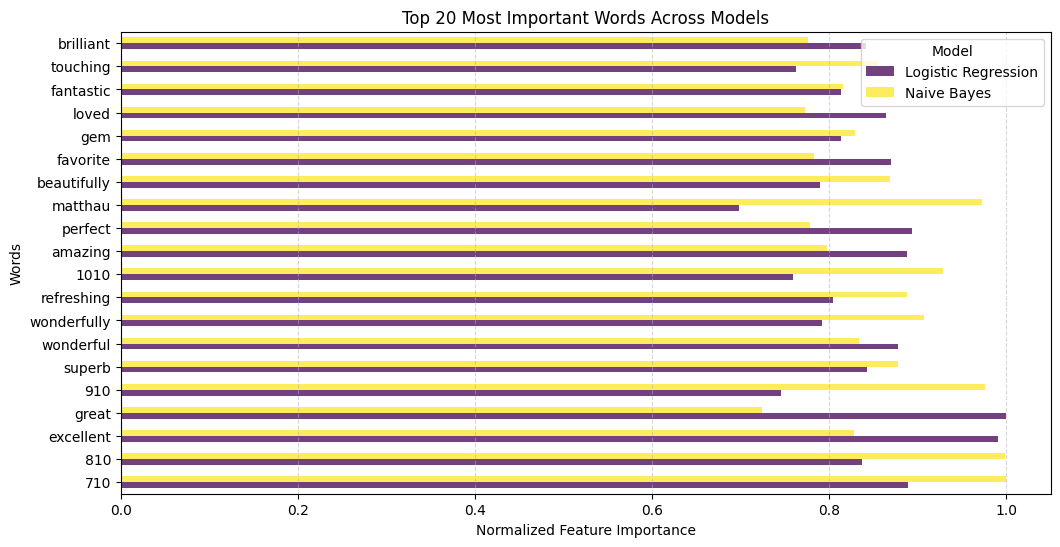

In [ ]:
plot_feature_importance_across_models(models, tfidf, top_n=20)
